In [17]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from denoising_diffusion import DenoisingDiffusion
from unet import UNet

In [2]:
eps_model = UNet(
    in_channels = 1,
    out_channels = 1,
    channels = 32,
    channel_multpliers = [1, 2, 4, 8],
    n_res_blocks = 2,
    attention_levels = [0, 1, 2],
    n_heads = 4,
    cond_channels = 3
).cuda(1)
diffusier = DenoisingDiffusion(
    eps_model = eps_model,
    n_steps=400,
    device='cuda:1'
).cuda(1)

In [3]:
diffusier.eps_model.load_state_dict(torch.load('/media/bamf-big/gefan/DiffFluids/diff_fluids/ddpm/checkpoint/smoke_medium_unet_normalized.pth'))

<All keys matched successfully>

### Interpolate on Time

In [29]:
ts = np.linspace(10.0, 10.9, 10)
x = 6.0
y = 10.0
conditions = [[t, x, y] for t in ts]
conditions = torch.tensor(conditions, dtype=torch.float32, device='cuda:1')
x0 = torch.randn((10, 1, 64, 64), device='cuda:1')
x = diffusier.sample(x0, conditions)

100%|██████████| 400/400 [00:18<00:00, 21.29it/s]


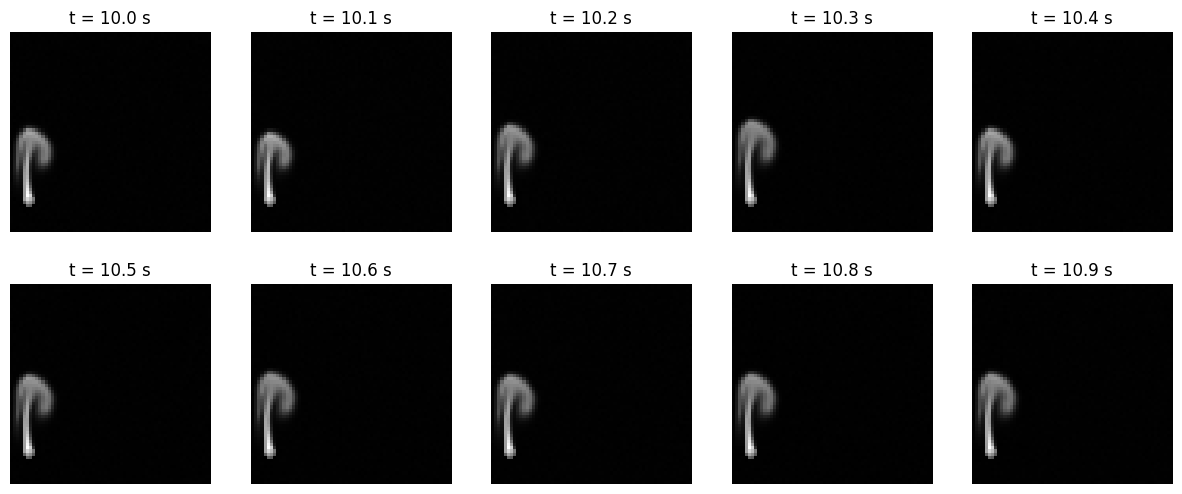

In [30]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(x[i, 0].cpu().detach().numpy(), cmap='gray', origin='lower')
    ax[i // 5, i % 5].set_title(f't = {ts[i]} s')
    ax[i // 5, i % 5].axis('off')

In [36]:
ts = np.linspace(0.1, 45.1, 10)
x = 6.0
y = 10.0
conditions = [[t, x, y] for t in ts]
conditions = torch.tensor(conditions, dtype=torch.float32, device='cuda:1')
x0 = torch.randn((10, 1, 64, 64), device='cuda:1')
x = diffusier.sample(x0, conditions)

100%|██████████| 400/400 [00:18<00:00, 21.76it/s]


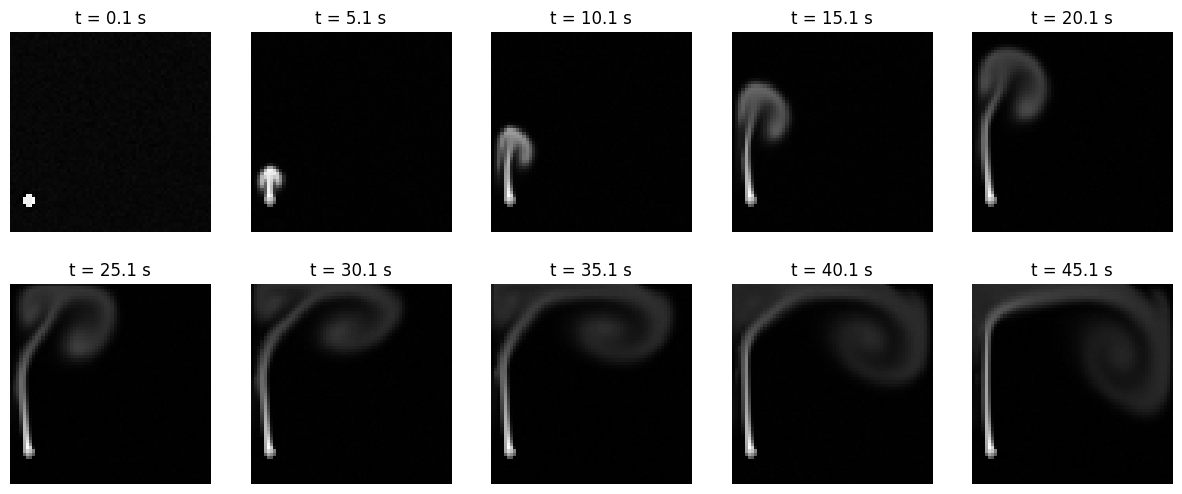

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(x[i, 0].cpu().detach().numpy(), cmap='gray', origin='lower')
    ax[i // 5, i % 5].set_title(f't = {ts[i]} s')
    ax[i // 5, i % 5].axis('off')

### Interpolate on positions

In [32]:
t = 15.0
xs = np.linspace(6.0, 58.0, 10)
y = 10.0
conditions = [[t, x, y] for x in xs]
conditions = torch.tensor(conditions, dtype=torch.float32, device='cuda:1')
x0 = torch.randn((10, 1, 64, 64), device='cuda:1')
x = diffusier.sample(x0, conditions)

100%|██████████| 400/400 [00:18<00:00, 21.25it/s]


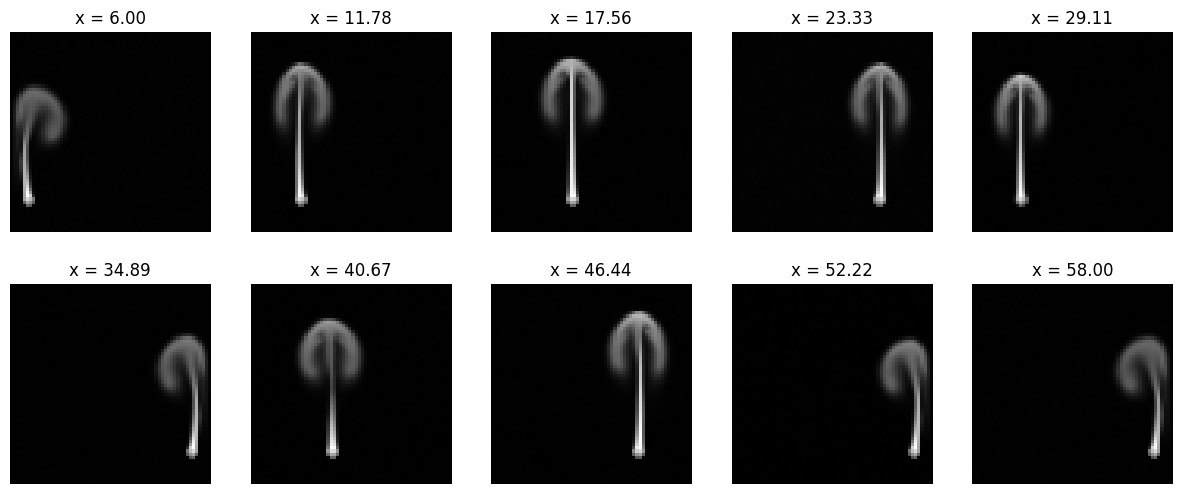

In [34]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(x[i, 0].cpu().detach().numpy(), cmap='gray', origin='lower')
    ax[i // 5, i % 5].set_title(f'x = {xs[i]:.2f}')
    ax[i // 5, i % 5].axis('off')